In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Tenserflow/TensorFlow_FILES/DATA/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


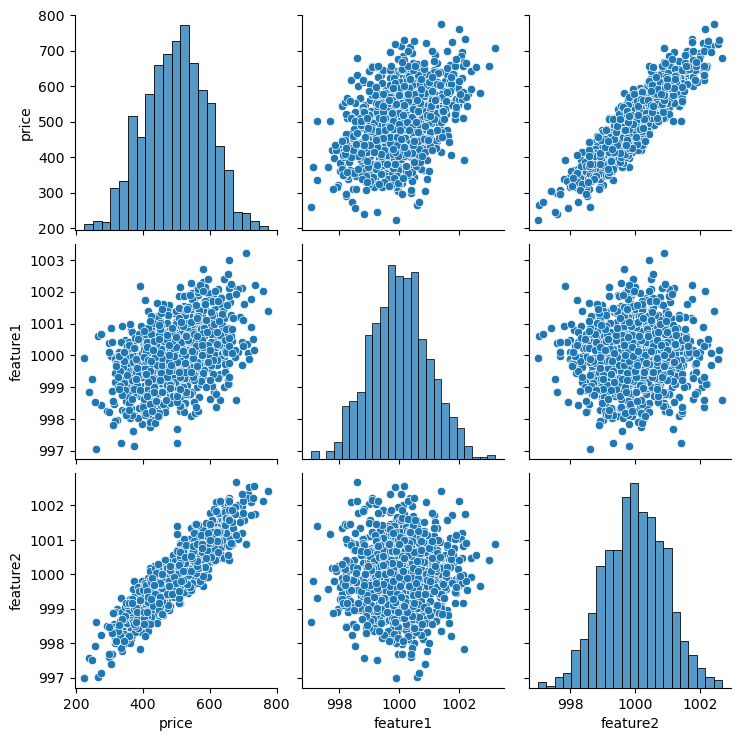

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['feature1','feature2']].values

In [7]:
y=df['price'].values

In [9]:
#X

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train=scaler.transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

In [24]:
#import tensorflow as tf

In [15]:
from tensorflow.python.keras.layers import Input, Dense

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [33]:
#help(Sequential)

In [17]:
model=Sequential()

In [18]:
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(    optimizer='rmsprop',
    loss='mse')

In [19]:
model.fit(x=X_train,y=y_train,epochs=250,verbose=10)

Epoch 1/250
Epoch 2/250
Epoch 3/250
Epoch 4/250
Epoch 5/250
Epoch 6/250
Epoch 7/250
Epoch 8/250
Epoch 9/250
Epoch 10/250
Epoch 11/250
Epoch 12/250
Epoch 13/250
Epoch 14/250
Epoch 15/250
Epoch 16/250
Epoch 17/250
Epoch 18/250
Epoch 19/250
Epoch 20/250
Epoch 21/250
Epoch 22/250
Epoch 23/250
Epoch 24/250
Epoch 25/250
Epoch 26/250
Epoch 27/250
Epoch 28/250
Epoch 29/250
Epoch 30/250
Epoch 31/250
Epoch 32/250
Epoch 33/250
Epoch 34/250
Epoch 35/250
Epoch 36/250
Epoch 37/250
Epoch 38/250
Epoch 39/250
Epoch 40/250
Epoch 41/250
Epoch 42/250
Epoch 43/250
Epoch 44/250
Epoch 45/250
Epoch 46/250
Epoch 47/250
Epoch 48/250
Epoch 49/250
Epoch 50/250
Epoch 51/250
Epoch 52/250
Epoch 53/250
Epoch 54/250
Epoch 55/250
Epoch 56/250
Epoch 57/250
Epoch 58/250
Epoch 59/250
Epoch 60/250
Epoch 61/250
Epoch 62/250
Epoch 63/250
Epoch 64/250
Epoch 65/250
Epoch 66/250
Epoch 67/250
Epoch 68/250
Epoch 69/250
Epoch 70/250
Epoch 71/250
Epoch 72/250
Epoch 73/250
Epoch 74/250
Epoch 75/250
Epoch 76/250
Epoch 77/250
Epoch 78

In [20]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

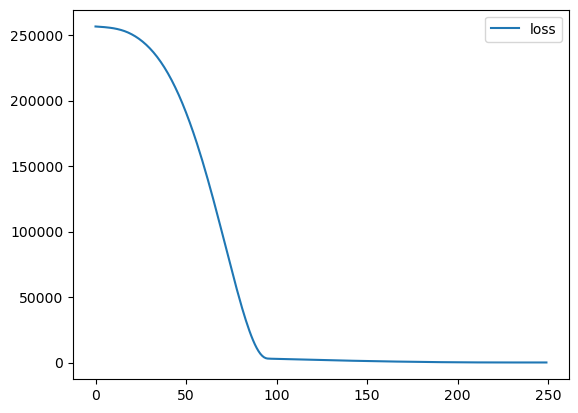

In [21]:
loss_df.plot()

In [22]:
model.evaluate(X_test,y_test,verbose=0)                                          

25.536033630371094

In [23]:
model.evaluate(X_train,y_train,verbose=0)         

23.87673568725586

In [24]:
test_predictions=model.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [26]:
test_predictions=pd.Series(test_predictions.reshape(300,))

In [39]:
pre_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [40]:
pre_df=pd.concat([pre_df,test_predictions],axis=1)

In [42]:
pre_df.columns=['Test True Y','Model Predict']

<Axes: xlabel='Test True Y', ylabel='Model Predict'>

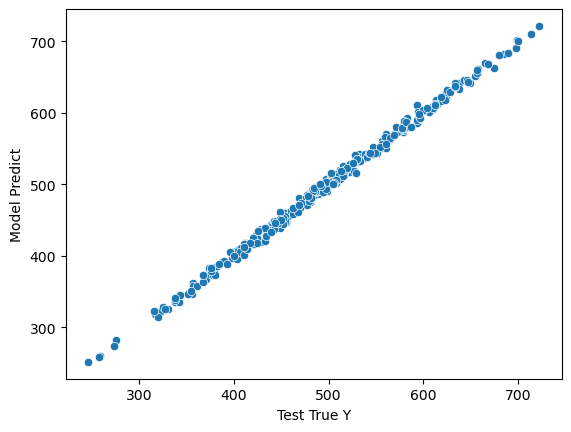

In [44]:
sns.scatterplot(x='Test True Y',y='Model Predict',data=pre_df)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pre_df['Test True Y'],pre_df['Model Predict'])

4.080255147172788

In [48]:
mean_squared_error(pre_df['Test True Y'],pre_df['Model Predict'])**0.5

5.053319428738215

In [49]:
new_gem=[[998,1000]]

In [50]:
new_gem=scaler.transform(new_gem)

In [51]:
model.predict(new_gem)

1/1 [==============================] - 0s 78ms/step


array([[420.60056]], dtype=float32)

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('my_gem_model.h5')

C:\Users\91774\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
later_model=load_model('my_gem_model.h5')

In [55]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 238ms/step


array([[420.60056]], dtype=float32)